<a href="https://colab.research.google.com/github/vokosun/My-Portfolio-VanessaO/blob/main/Obesity_Over_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**: The Evolution of Diabetes Over Time
Accessed through https://www.ncdrisc.org/data-downloads-diabetes.html 

**Research/Business Question:**

* Have the prevalence of Diabetes increased rapidly over the years in women and 
men?
---
# **Hypothesis:**
* Diabetes has increased rapidly over the years in women 
* Diabetes has increased rapidly over the years in men

**How to test the hypothesis?**
* I will be using the year, sex, and the crude diabetes prevalence to test my two hypothesis to find out if diabetes inceases rapidly over the years in both men and women. 
---

**Who will find your findings valuable, and how will they use them?**
* Doctors, epidemiologists, and other health professionals, and health organizations will find my findings valuable and also use them to create change or tackle a health issue in the world. 



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import pandas and read in the GDrive-mounted CSV
    
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
import scipy.stats as stats
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")
    
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Diabetes Over Time.csv')
df.head()

,Country/Region/World,ISO,Sex,Year,Crude diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1980,0.028291,0.008573,0.064234
1,Afghanistan,AFG,Men,1981,0.028931,0.009486,0.062902
2,Afghanistan,AFG,Men,1982,0.029537,0.010453,0.062017
3,Afghanistan,AFG,Men,1983,0.030114,0.011449,0.061258
4,Afghanistan,AFG,Men,1984,0.030696,0.012390,0.060015


 **Descriptive Statistics**
* I have included some descriptive statistics of that data that include some
counts, the mean, maximum and minimum of each of the columns in the dataset. 
* Diving into the descriptive statistics can help us see some of the values and how diabetes increases throughout the years.
---

* This was a sample size of **13,540**.
* The year range is from **1980 - 2014**.

In [ ]:
df.describe()

,Year,Crude diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
count,13650.000000,13650.000000,13650.000000,13650.000000
mean,1997.000000,0.064005,0.037929,0.099751
std,10.099875,0.035022,0.025618,0.046277
min,1980.000000,0.005387,0.000793,0.017785
25%,1988.000000,0.041179,0.020971,0.070211
50%,1997.000000,0.059015,0.033705,0.092593
75%,2006.000000,0.077626,0.048545,0.117512
max,2014.000000,0.297842,0.206040,0.436330


**Null Values**

We want to check to see if there are any lack of values in any of the colums.
We can also see here there are a total of 7 columns. The columns that we will be focusing on is **year, crude diabetes prevalence and sex column**


---
* None of the columns have a null value which is good so we can proceed. 







In [ ]:
#Lets get the columns, the data type and see if there are any null values

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country/Region/World            13650 non-null  object 
 1   ISO                             13650 non-null  object 
 2   Sex                             13650 non-null  object 
 3   Year                            13650 non-null  int64  
 4   Crude diabetes prevalence       13650 non-null  float64
 5   Lower 95% uncertainty interval  13650 non-null  float64
 6   Upper 95% uncertainty interval  13650 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 746.6+ KB


**Sample size of men and women**
* There are a total of 6,825 men and 6,825 women in this dataset.
* This will aid us in comparing the diabetes prevalence over the years for both men and women. 

In [ ]:
#The number of men and women in this dataset

sex_counts = df['Sex'].value_counts()
sex_counts

Men      6825
Women    6825
Name: Sex, dtype: int64

# **Country/Region/World**


There are a total of **195** different Countries/Regione/World with a total of **70** people per country.



In [ ]:
# Lets figure out the total counts of people, men and women, in this dataset

df['Country/Region/World'].nunique()

195

In [ ]:
# Lets count the people per Country 
# There was a sample of 70 people per country 

people_counts = df['Country/Region/World'].value_counts()
people_counts

Malaysia    70
Somalia     70
Zambia      70
Slovakia    70
DR Congo    70
            ..
Morocco     70
Grenada     70
Sweden      70
Malta       70
Nigeria     70
Name: Country/Region/World, Length: 195, dtype: int64

# **Statistical Analysis**
* Statistical anlysis would help us explore the data to see if there is a pattern or trend in relation to the hypothesis that was formulated. 


---
**Pearson Correlation Coefficient**


When you find the pearson correlation coefficient, you are testing to see if there is a linear relationship existing between two columsn. 
  * In this case the columns that we are trying to find a correlation is the **year** and **crude diabetes prevalence** column.

It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship. The value is between -1 and 1. 
  * 1 means there is a strong relationship that exist and -1 means that there is a strong negative correlation. 0 means there is no relationship at all


---


**Hypothesis:**
* Diabetes has increased rapidly over the years in women 
      H₀: µ1 = µ2 (The two populations means are equal)
      Hₐ: µ1 ≠ µ2 (The two populations means are not equal)
* Diabetes has increased rapidly over the years in men
      H₀: µ1 = µ2 (The two populations means are equal)
      Hₐ: µ1 ≠ µ2 (The two populations means are not equal)



In [ ]:
# Lets find the Pearson correlation coefficient. 
# The value is farther from 0 which means that there is some type of relationship between years and the crude diabetes prevalence 
# Hypothesis:
# H₀: µ1 = µ2 (The two populations means are equal)
# Hₐ: µ1 ≠ µ2 (The two populations means are not equal)

df[['Year', 'Crude diabetes prevalence']].corr()

,Year,Crude diabetes prevalence
Year,1.000000,0.410139
Crude diabetes prevalence,0.410139,1.000000


The correlation coefficient is **.410**. This means that there is a **moderate positive relationship** between the year and crude diabetes prevalence. 

This means when the value of one variable increases, there is a chance that the value of the other variable will increases in a similar fashion. When the year increase, the diabetes prevalence also increase. This backs up our two hypothesis. 

**Second statistical test**


---

**An independent-samples t-test**

An independent-samples t-test will compare the means of these two samples, sex and crude diabetes prevalence. It will also give a p-value indicating how likely it is that this difference is due to random chance. 

In this test we will see if the crude diabetes prevalence is changed between 1980 and 2014. This will be a second test that will help us confirm the two hypothesis that we have made. 


---


In [ ]:
year_1980 = df.iloc[(df['Year'] == 1980).values]
year_1980.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 13615
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country/Region/World            390 non-null    object 
 1   ISO                             390 non-null    object 
 2   Sex                             390 non-null    object 
 3   Year                            390 non-null    int64  
 4   Crude diabetes prevalence       390 non-null    float64
 5   Lower 95% uncertainty interval  390 non-null    float64
 6   Upper 95% uncertainty interval  390 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 24.4+ KB


In [ ]:
year_2014 = df.iloc[(df['Year'] == 2014).values]
year_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 34 to 13649
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country/Region/World            390 non-null    object 
 1   ISO                             390 non-null    object 
 2   Sex                             390 non-null    object 
 3   Year                            390 non-null    int64  
 4   Crude diabetes prevalence       390 non-null    float64
 5   Lower 95% uncertainty interval  390 non-null    float64
 6   Upper 95% uncertainty interval  390 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 24.4+ KB


There are 390 salaries from 1980 and 390 salaries from 2014. The t-test will compare the two means from these two samples. It will give us a p-value which tells us if the difference is due to random chance. 


---
**Hypothesis**

H₀: µ1 = µ2 (The two populations means are equal)

Hₐ: µ1 ≠ µ2 (The two populations means are not equal)


In [ ]:
stats.ttest_ind(year_1980['Crude diabetes prevalence'], year_2014['Crude diabetes prevalence'])

Ttest_indResult(statistic=-19.059221974558152, pvalue=9.398625964606582e-67)

After conducting the independent-samples ttest, it gives a negative t-value and a p-value. 

If we look at the p-value, the **p-value is extremely small**, implying that this is a real difference. **The crude diabetes prevalence changed dramatically between 1980 and 2014**. 

This confirms that they are indeed a difference in crude prevalence 


# **Visualizations**

Visualizations will help us tell a story with the data. I will try to get two different visulizations, scatterplot and boxplot, that will help us see trends. 

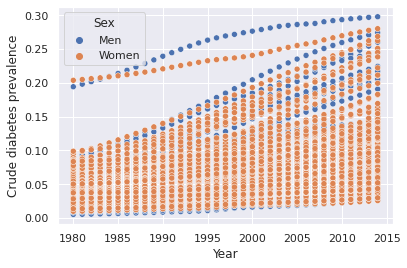

In [ ]:
# Visulizations

# Scatterplot

sns.scatterplot(x=df['Year'], y=df['Crude diabetes prevalence'], hue=df['Sex'], data=df)

#From the scatterplot, you can see that that is a gradual and linear increase in the crude diabetes prevalence in both men and women

From the scatterplot, you can see that that is a gradual and linear increase in the crude diabetes prevalence in both men and women. There is a positive co-relation, a positive correlation, between year and crude diabetes prevalence.

**Box Plot**


---

Box plots visually illustrate the distribution of values in a category.
Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups.

The box plot is sex vs crude diabetes prevalence 



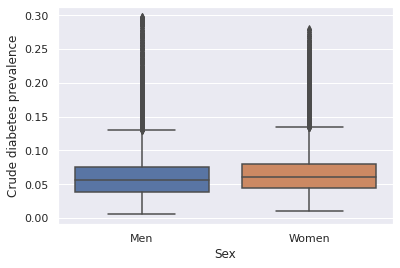

In [ ]:
# Boxplot of Sex vs crude diabetes prevalence.

sns.boxplot(y="Crude diabetes prevalence", x="Sex", data=df)

From the box plot, we see that majority of the diabetes prevalence are outliers. These outliers are more than the maximum value. We see how the values distribute throughout the different quartiles. 

# **Recommendations/Conclusions**

---


*   The crude diabetes prevalence seems to be increasing rapidly as the years increases for both men and women. 
  *   This confirms both hypothesis that Diabetes have rapidly increased overly the years in both men and women


---


* I would recommend putting in place some education-based programs that would help educate the community. Educating the community could help potentially lower the prevalence in diabetes globally.  


